In [2]:
"""
Template for week 3 project in Data Visualization

Read, clean, and plot financial time series from stock indices using matplotlib
"""
import re
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"

# Financial data files
DJIA_34 = DATA_PATH + "DJIA_34.csv"
DJIA = DATA_PATH + "DJIA.csv"
NASDAQ_100 = DATA_PATH + "NASDAQ_100.csv"
NASDAQ = DATA_PATH + "NASDAQ.csv"
SP500 = DATA_PATH + "SP500.csv"


In [4]:
###################################################################
# Part 1 - Read, clean, and plot financial time series data 

def read_series(index_file): 
    """
    Input: String index_file for CSV file containing stock index data
    
    Output: Time series as a list of tuples where each tuple is
    a pair of strings corresponding to a row in the CSV file
    """ 
   
    with open(index_file, 'r') as file: 
        return [tuple(row) for row in csv.reader(file)]
    

In [5]:
def clean_series(raw_series):
    """
    Input: List raw_series whose entries are tuples (date, price)
    where dates corresponding to holidays have price "."
    
    Output: A list whose entries are tuples consisting of
    a date (string) and a price (float). Entries corresponding
    to the header and holidays have been removed.
    """
    cleaned_series = []

    for date, price in raw_series[1: ]:
        if price != '.': 
            cleaned_series.append((date, float(price)))

    return cleaned_series
    

In [6]:
def plot_prices(index_file): 
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consistin of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    raw_series = read_series(index_file)
    cleaned_series = clean_series(raw_series)
    
    x_val = []
    y_val = []
    for idx in range(len(cleaned_series)):
        x_val.append(cleaned_series[idx][0])
        y_val.append(cleaned_series[idx][1])
    
    fig = plt.figure(figsize=(20, 10))
    axs = fig.add_subplot()
    axs.plot(x_val, y_val)
    axs.set_ylabel('price (dollars)', fontsize=12)
    axs.set_title(re.search(r'data/(\w+).csv', index_file).group(1), fontsize=12)
    
    #turn the x axis to be more readable
    #plt.xticks(rotation=90)
    axs.set_xticklabels(x_val, rotation=90)
    

    return fig


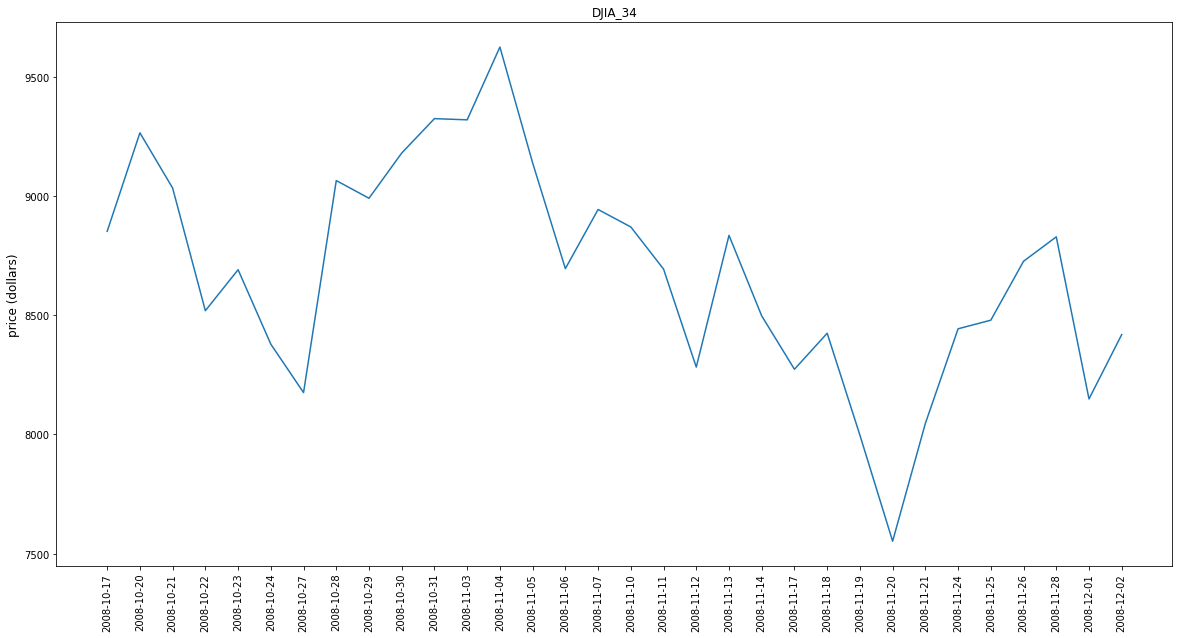

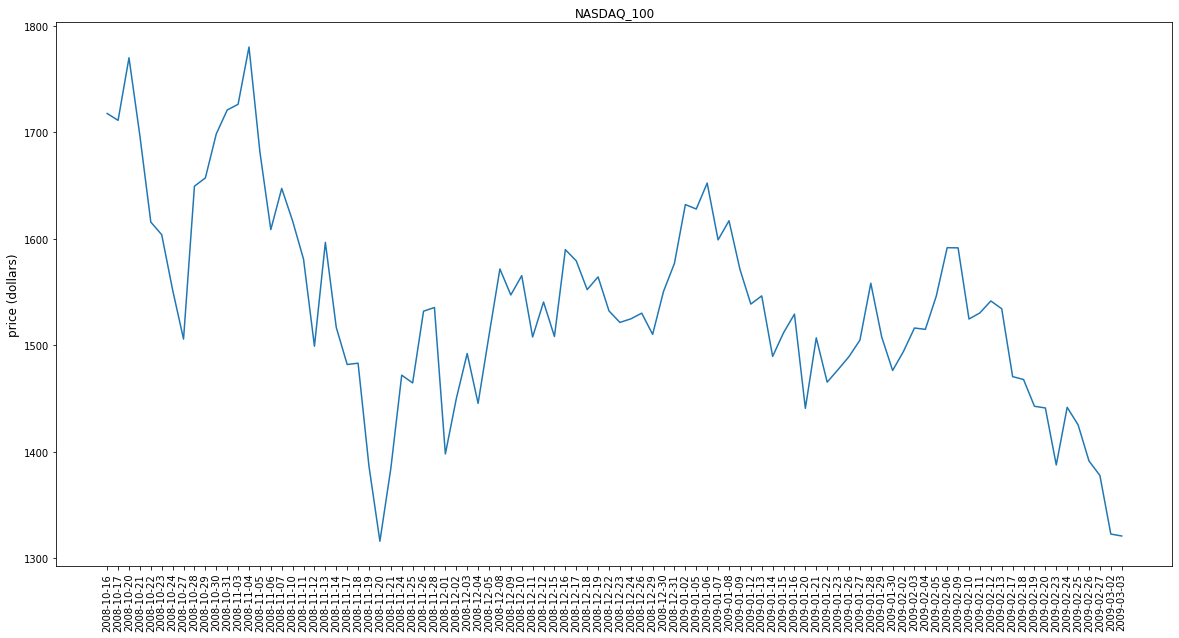

In [7]:
def test_plot_prices(): 
    """ Test plot_prices """
    
    plot_prices(DJIA_34)
    plot_prices(NASDAQ_100)

test_plot_prices()

In [8]:
###########################################################
# Part 2 - Convert ISO data format to days and make better plots

def isodate_to_day(isodate): 
    """
    Input: A string date in ISO date format

    Output: Float corrspending to mumber of days used in
    matplotlib's plt.plot_date()
    """
    date_obj = datetime.strptime(isodate, '%Y-%m-%d')
    mpl_date = mdates.date2num(date_obj)

    return mpl_date


In [9]:
###########################################################
# Student code for more plots in matplotlib (peer-graded)

def plot_dates_prices(index_file): 
    """
    Input: Strings index_file for CSV file with stock index data
    
    Output: matplotlib figure generated by reading the CSV file
    index_file and plotting the dates/prices using isodate_to_day()
    """  
    raw_series = read_series(index_file)
    cleaned_series = clean_series(raw_series)
    
    x_val = []
    y_val = []
    for idx in range(len(cleaned_series)): 
        x_val.append(isodate_to_day(cleaned_series[idx][0]))
        y_val.append(cleaned_series[idx][1])
 
    
    fig = plt.figure(figsize=(20, 10)) #set figsize
    axs = fig.add_subplot()
    axs.plot(x_val, y_val)
    axs.set_xlabel('day', fontsize=12)
    axs.set_ylabel('price (dollars)', fontsize=12)
    axs.set_title(re.search(r'data/(\w+).csv', index_file).group(1), fontsize=12)
    
    # Format x-axis ticks as years
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs.xaxis.set_major_locator(mdates.YearLocator())
    
    
    return fig

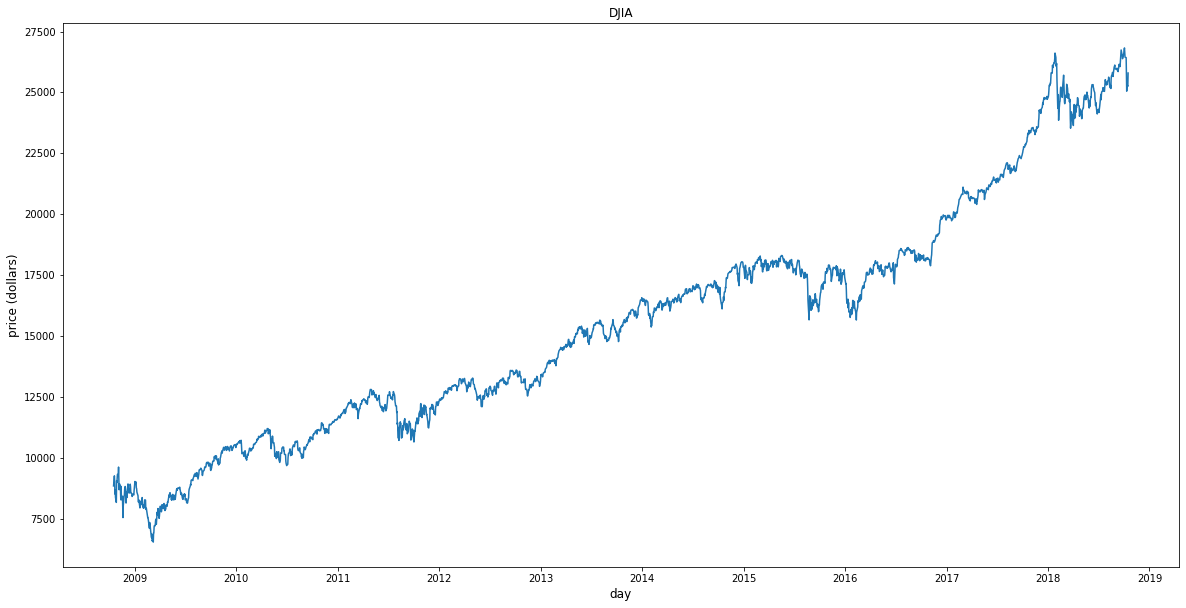

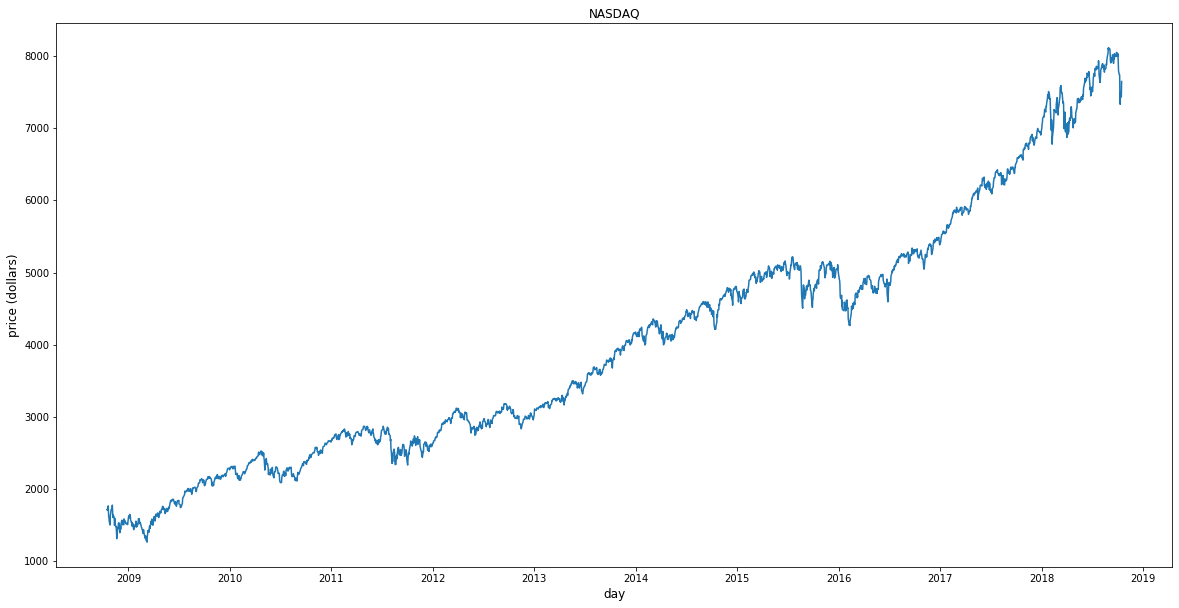

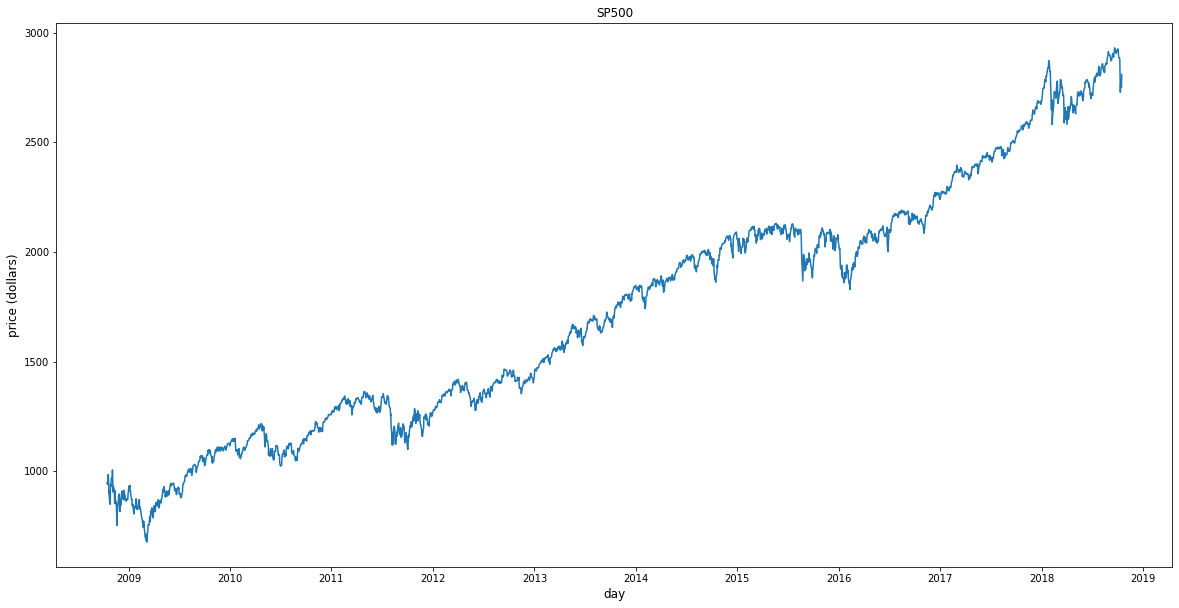

In [10]:
def test_plot_dates_prices():
    """ Test plot_dates_prices"""

    plot_dates_prices(DJIA)
    plot_dates_prices(NASDAQ)
    plot_dates_prices(SP500)
    
test_plot_dates_prices()   

In [15]:
def plot_two_indices(index_file1, index_file2):
    """
    Input: Strings index_file1 and index_file2
    with CSV data for pair of stock indices
    
    Output: matplotlib figure generated by plotting a comparison
    of the price of two indices in the style of 
    https://matplotlib.org/gallery/api/two_scales.html
    """

    cleaned_series_1 = clean_series(read_series(index_file1))
    x_val_1 = []
    y_val_1 = []
    for idx in range(len(cleaned_series_1)): 
        x_val_1.append(isodate_to_day(cleaned_series_1[idx][0]))
        y_val_1.append(cleaned_series_1[idx][1])
    label1 = re.search(r'data/(\w+).csv', index_file1).group(1)

    cleaned_series_2 = clean_series(read_series(index_file2))
    x_val_2 = []
    y_val_2 = []
    for idx in range(len(cleaned_series_2)): 
        x_val_2.append(isodate_to_day(cleaned_series_2[idx][0]))
        y_val_2.append(cleaned_series_2[idx][1])
    label2 = re.search(r'data/(\w+).csv', index_file2).group(1)
    
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(x_val_1, y_val_1, 'g-')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel(f'{label1} Price (dollars)', fontsize=12, color='g')
    ax1.tick_params(axis='y', labelcolor='g')

    ax2.plot(x_val_2, y_val_2, 'b-')
    ax2.set_ylabel(f'{label2} Price (dollars)', fontsize=12, color='b')
    ax2.tick_params(axis='y', labelcolor='b')

   
    ax1.set_title(f'{label1} and {label2} Index Prices Comparison', fontsize=14)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.xticks(rotation=45)
    return fig

   

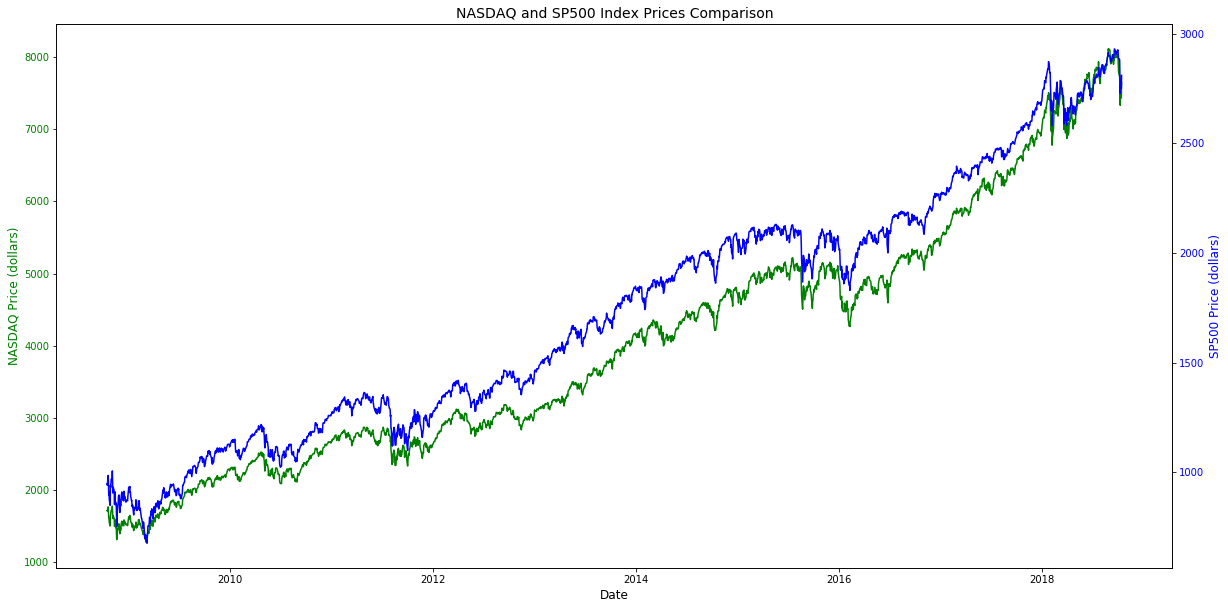

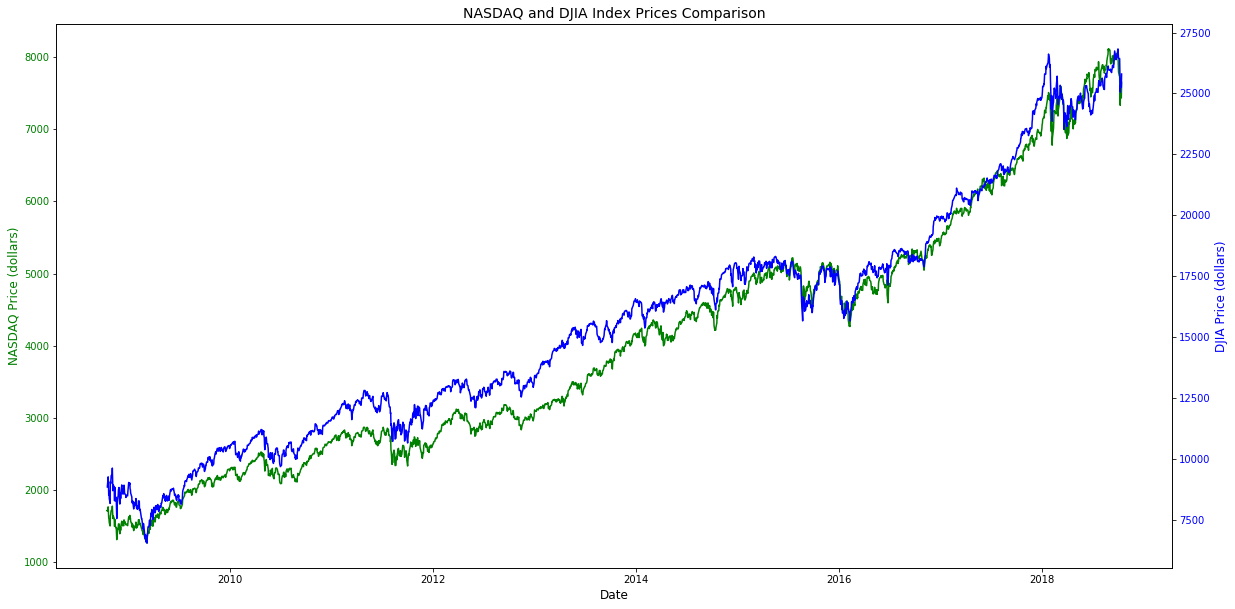

In [16]:
def test_plot_two_indices():
    """ Test plot_two_indices """
    
    plot_two_indices(NASDAQ, SP500)
    plot_two_indices(NASDAQ, DJIA)
    
test_plot_two_indices()